In [19]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import quandl
import re

API = 'Your_Key'
quandl.ApiConfig.api_key = API

In [2]:
coin_list = ['BITFINEX/ZECUSD','BITFINEX/ETCUSD','BITFINEX/BTCUSD',
             'BITFINEX/LTCUSD', 'BITFINEX/ETHUSD','BITFINEX/XMRUSD']

In [3]:
coin_dict = {}
for coin in coin_list:
    coin_dict[coin] = quandl.get(coin, start_date="2016-12-01")
    print(len(coin_dict[coin]))

191
191
190
191
191
191


In [4]:
coin_name_only = [ re.split('/', name)[1] for name in coin_list ]  
print(coin_name_only)

['ZECUSD', 'ETCUSD', 'BTCUSD', 'LTCUSD', 'ETHUSD', 'XMRUSD']


In [5]:
frame = [ coin_dict[name]['Mid'] for name in coin_list ]
#for name, item in coin_dict.items():
#    frame.append(item)
df = pd.concat(frame, axis=1, keys=coin_name_only)
print(df.head())

             ZECUSD    ETCUSD   BTCUSD   LTCUSD   ETHUSD   XMRUSD
Date                                                             
2016-12-01  67.9220  0.742135  738.900  3.85435  8.53500  8.94155
2016-12-02  62.5295  0.764800  755.395  3.88895  8.43890  8.57865
2016-12-03  59.5025  0.802745  774.690  3.90960  7.72055  8.13915
2016-12-04  59.1835  0.767305  766.330  3.91195  7.85885  8.14555
2016-12-05  57.9080  0.765055  768.120  3.89690  7.41280  7.76480


In [6]:
print(len(df))
df.dropna(inplace=True)
print(len(df))

191
190


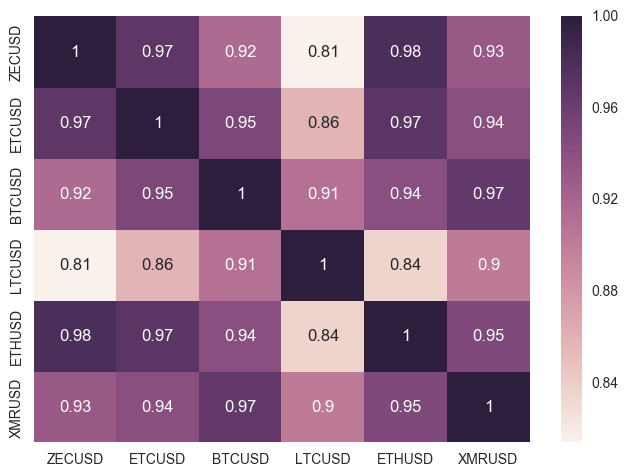

In [8]:
sns.set()
sns.heatmap(df.corr(min_periods=12), annot=True)
plt.show()

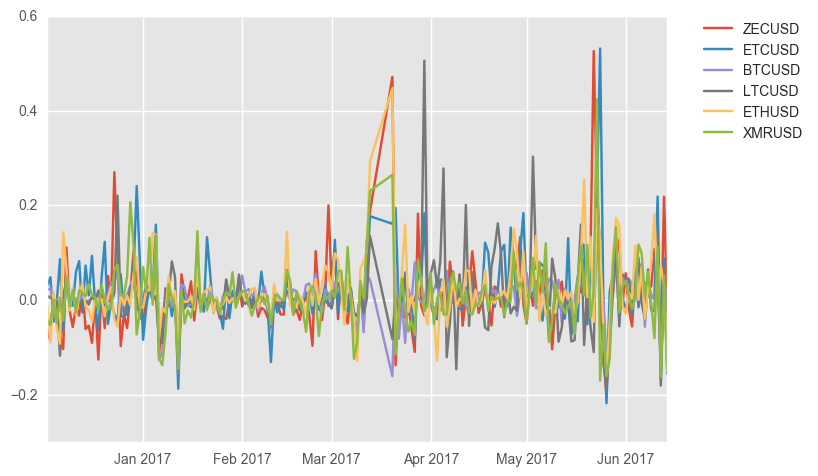

In [20]:
log_df = pd.DataFrame()
for col in df.columns:
    temp = df[col]
    log_ = np.log(temp) - np.log(temp.shift(1))
    plt.plot(temp.index, log_, label=col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    log_df[col] = log_
    
plt.show()

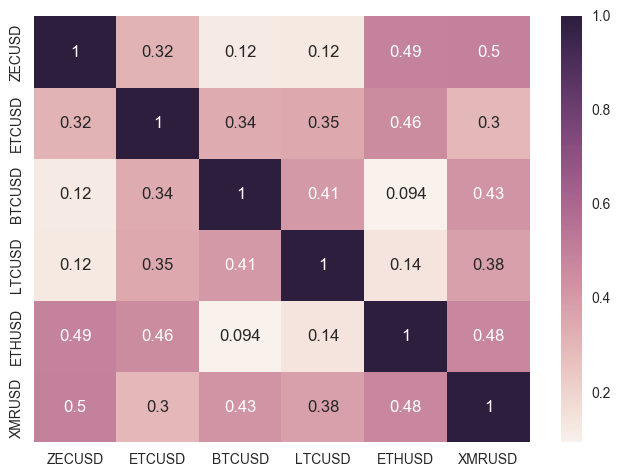

In [16]:
sns.set()
sns.heatmap(log_df.corr(min_periods=12), annot=True)
plt.show()

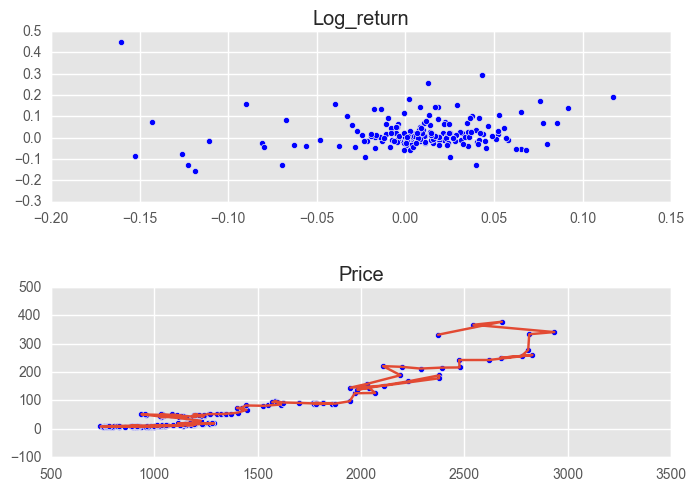

In [25]:
BTC = df['BTCUSD']
ETH = df['ETHUSD']
log_btc = log_df['BTCUSD']
log_eth = log_df['ETHUSD']

fig = plt.figure()
fig.subplots_adjust(wspace=0.5,
                    hspace=0.5)
ax = fig.add_subplot(211)
ax.set(title='Log_return')
ax.scatter(log_btc, log_eth)

ax2 = fig.add_subplot(212)
ax2.set(title='Price')
ax2.plot(BTC, ETH)
ax2.scatter(BTC, ETH)

plt.show()

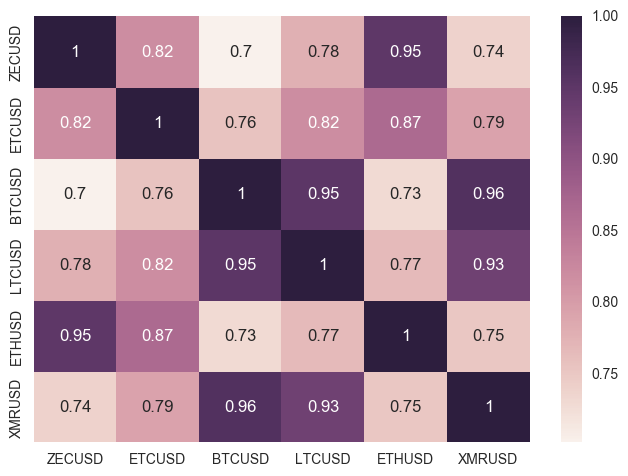

In [34]:
sns.set()
sns.heatmap(df[-20:].corr(min_periods=12), annot=True)
plt.show()